In [ ]:
# 1. Upload the dataset
from google.colab import files
uploaded = files.upload()  # choose har_clean_full.csv when prompted


Saving har_clean_full.csv to har_clean_full.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier



In [ ]:
# 3. Load the clean HAR dataset
df = pd.read_csv("har_clean_full.csv")

print(df.shape)
print(df.head())

# Features & labels
X = df.drop(columns=["subject", "activity"]).values
y = df["activity"].values

# Train-test split (stratified by activity)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train.shape, X_test.shape


(10299, 563)
   subject  tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
0        1       0.288585      -0.020294      -0.132905     -0.995279   
1        1       0.278419      -0.016411      -0.123520     -0.998245   
2        1       0.279653      -0.019467      -0.113462     -0.995380   
3        1       0.279174      -0.026201      -0.123283     -0.996091   
4        1       0.276629      -0.016570      -0.115362     -0.998139   

   tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  ...  \
0     -0.983111     -0.913526     -0.995112     -0.983185     -0.923527  ...   
1     -0.975300     -0.960322     -0.998807     -0.974914     -0.957686  ...   
2     -0.967187     -0.978944     -0.996520     -0.963668     -0.977469  ...   
3     -0.983403     -0.990675     -0.997099     -0.982750     -0.989302  ...   
4     -0.980817     -0.990482     -0.998321     -0.979672     -0.990441  ...   

   fBodyGyroJerkMagskewness  fBodyGyroJerkMagkurtosis  \
0         

((7209, 561), (3090, 561))

In [ ]:
# 4. Build models with PCA inside pipelines
def make_models(n_pca_components=50):
    models = {}

    # Logistic Regression
    lr = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", LogisticRegression(max_iter=500, multi_class="multinomial", n_jobs=-1))
    ])
    models["LogisticRegression"] = lr

    # SVM (RBF)
    svm = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", SVC(kernel="rbf"))
    ])
    models["SVM_RBF"] = svm

    # KNN
    knn = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", KNeighborsClassifier())
    ])
    models["KNN"] = knn

    # LDA
    lda = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", LinearDiscriminantAnalysis())
    ])
    models["LDA"] = lda

    # Decision Tree
    dt = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", DecisionTreeClassifier(random_state=42))
    ])
    models["DecisionTree"] = dt

    return models

models = make_models()
list(models.keys())


['LogisticRegression', 'SVM_RBF', 'KNN', 'LDA', 'DecisionTree']

In [ ]:
# 5. Train and evaluate all models
results = []

for name, model in models.items():
    print(f"\n=== Training {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results.append((name, acc))

# Summary
print("\nSummary:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")



=== Training LogisticRegression ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (LogisticRegression): 0.9466
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       583
           SITTING       0.88      0.88      0.88       533
          STANDING       0.89      0.89      0.89       572
           WALKING       0.98      0.97      0.97       517
WALKING_DOWNSTAIRS       0.97      0.98      0.98       422
  WALKING_UPSTAIRS       0.96      0.96      0.96       463

          accuracy                           0.95      3090
         macro avg       0.95      0.95      0.95      3090
      weighted avg       0.95      0.95      0.95      3090


=== Training SVM_RBF ===
Accuracy (SVM_RBF): 0.9531
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       583
           SITTING       0.90      0.87      0.88       533
          STANDING       0.89      0.91      0.90       572
           WALKING       0.99      0.99      0.99       517
WALKI

In [ ]:
def plot_confusion(cm, class_names, title="Confusion matrix"):
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm, interpolation="nearest")
    ax.figure.colorbar(im, ax=ax)
    ax.set_title(title)
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names, rotation=45, ha="right")
    ax.set_yticklabels(class_names)
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    plt.tight_layout()
    plt.show()



Training model: LogisticRegression
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params for LogisticRegression: {'clf__C': 1, 'pca__n_components': 70}

Test Accuracy for LogisticRegression: 0.9557

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       583
           SITTING       0.91      0.90      0.90       533
          STANDING       0.91      0.92      0.91       572
           WALKING       0.98      0.97      0.98       517
WALKING_DOWNSTAIRS       0.97      0.98      0.98       422
  WALKING_UPSTAIRS       0.97      0.97      0.97       463

          accuracy                           0.96      3090
         macro avg       0.96      0.96      0.96      3090
      weighted avg       0.96      0.96      0.96      3090



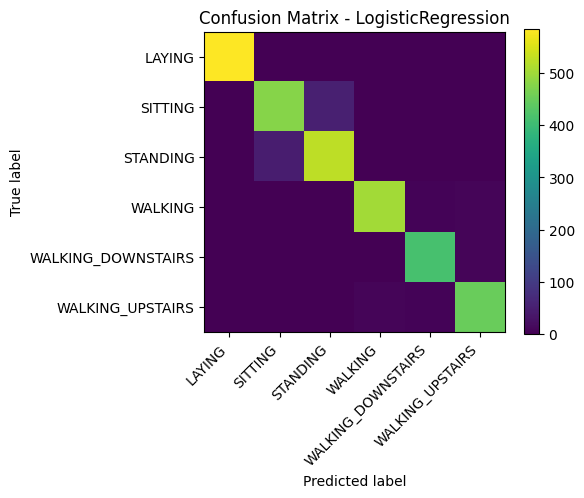


Training model: SVM_RBF
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params for SVM_RBF: {'clf__C': 10, 'clf__gamma': 0.01, 'pca__n_components': 70}

Test Accuracy for SVM_RBF: 0.9531

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       583
           SITTING       0.94      0.92      0.93       533
          STANDING       0.95      0.94      0.95       572
           WALKING       1.00      0.96      0.98       517
WALKING_DOWNSTAIRS       0.84      0.99      0.91       422
  WALKING_UPSTAIRS       0.99      0.95      0.97       463

          accuracy                           0.95      3090
         macro avg       0.95      0.95      0.95      3090
      weighted avg       0.96      0.95      0.95      3090



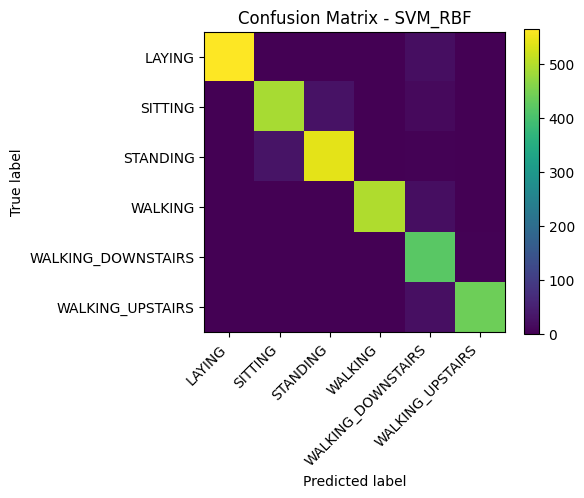


Training model: KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for KNN: {'clf__n_neighbors': 3, 'clf__weights': 'distance', 'pca__n_components': 70}

Test Accuracy for KNN: 0.9485

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       583
           SITTING       0.90      0.86      0.88       533
          STANDING       0.87      0.91      0.89       572
           WALKING       0.98      0.99      0.98       517
WALKING_DOWNSTAIRS       0.98      0.96      0.97       422
  WALKING_UPSTAIRS       0.98      0.98      0.98       463

          accuracy                           0.95      3090
         macro avg       0.95      0.95      0.95      3090
      weighted avg       0.95      0.95      0.95      3090



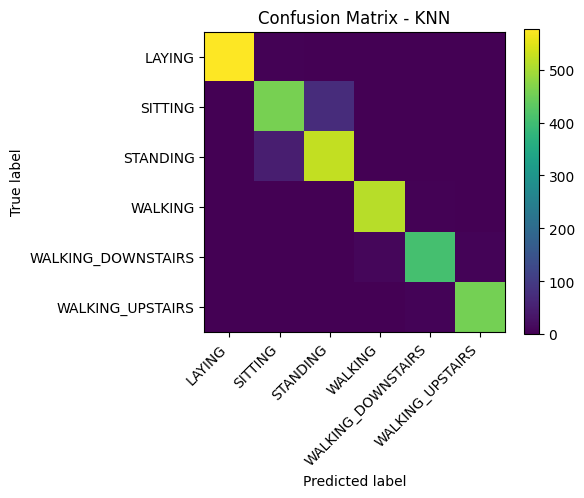


Training model: LDA
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params for LDA: {'pca__n_components': 70}

Test Accuracy for LDA: 0.9207

Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.98      0.99      0.99       583
           SITTING       0.88      0.79      0.83       533
          STANDING       0.84      0.91      0.87       572
           WALKING       0.96      0.96      0.96       517
WALKING_DOWNSTAIRS       0.97      0.92      0.95       422
  WALKING_UPSTAIRS       0.91      0.95      0.93       463

          accuracy                           0.92      3090
         macro avg       0.92      0.92      0.92      3090
      weighted avg       0.92      0.92      0.92      3090



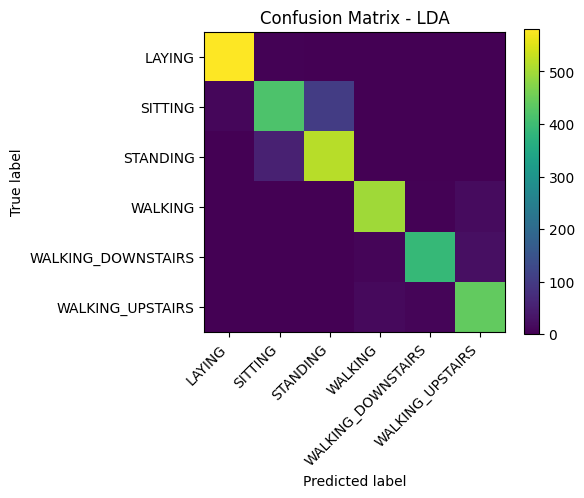


Training model: DecisionTree
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params for DecisionTree: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'pca__n_components': 30}

Test Accuracy for DecisionTree: 0.8350

Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.96      0.93      0.95       583
           SITTING       0.72      0.75      0.73       533
          STANDING       0.79      0.79      0.79       572
           WALKING       0.85      0.86      0.86       517
WALKING_DOWNSTAIRS       0.81      0.83      0.82       422
  WALKING_UPSTAIRS       0.87      0.84      0.86       463

          accuracy                           0.83      3090
         macro avg       0.84      0.83      0.83      3090
      weighted avg       0.84      0.83      0.84      3090



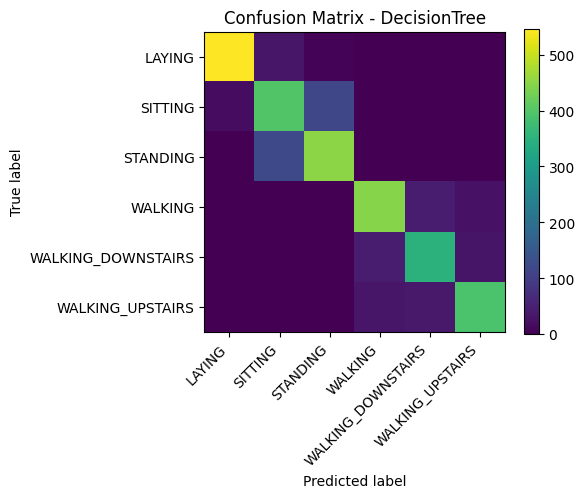

In [ ]:
results = []
best_models = {}
best_params_all = {}

cv_folds = 5  # you can change to 3 for speed if needed

# Redefine models with param_grids to fix the "too many values to unpack" error
def make_models_for_grid_search(n_pca_components=50):
    tuned_models = {}

    # Logistic Regression
    lr_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", LogisticRegression(max_iter=500, multi_class="multinomial", n_jobs=-1))
    ])
    lr_param_grid = {
        "clf__C": [0.1, 1, 10],
        "pca__n_components": [30, 50, 70] # Example grid search for PCA components too
    }
    tuned_models["LogisticRegression"] = (lr_pipe, lr_param_grid)

    # SVM (RBF)
    svm_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", SVC(kernel="rbf"))
    ])
    svm_param_grid = {
        "clf__C": [0.1, 1, 10],
        "clf__gamma": [0.01, 0.1, 1],
        "pca__n_components": [30, 50, 70]
    }
    tuned_models["SVM_RBF"] = (svm_pipe, svm_param_grid)

    # KNN
    knn_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", KNeighborsClassifier())
    ])
    knn_param_grid = {
        "clf__n_neighbors": [3, 5, 7],
        "clf__weights": ["uniform", "distance"],
        "pca__n_components": [30, 50, 70]
    }
    tuned_models["KNN"] = (knn_pipe, knn_param_grid)

    # LDA (No grid search for LDA parameters for simplicity, but PCA can be tuned)
    lda_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", LinearDiscriminantAnalysis())
    ])
    lda_param_grid = {
        "pca__n_components": [30, 50, 70]
    } # Keep it empty if no params to tune, or tune PCA
    tuned_models["LDA"] = (lda_pipe, lda_param_grid)

    # Decision Tree
    dt_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_pca_components)),
        ("clf", DecisionTreeClassifier(random_state=42))
    ])
    dt_param_grid = {
        "clf__max_depth": [None, 10, 20, 30],
        "clf__min_samples_split": [2, 5, 10],
        "pca__n_components": [30, 50, 70]
    }
    tuned_models["DecisionTree"] = (dt_pipe, dt_param_grid)

    return tuned_models

models = make_models_for_grid_search()

for name, (pipe, param_grid) in models.items():
    print(f"\n====================")
    print(f"Training model: {name}")
    print(f"====================")

    if param_grid:  # use GridSearch if we have a param grid
        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            cv=cv_folds,
            n_jobs=-1,
            scoring="accuracy",
            verbose=1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        print(f"Best params for {name}: {best_params}")
        best_params_all[name] = best_params
    else:
        # If no param_grid, just fit the pipeline
        pipe.fit(X_train, y_train)
        best_model = pipe
        best_params_all[name] = {} # No best params if no grid search

    # Store the best model
    best_models[name] = best_model

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy for {name}: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    results.append((name, acc))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    plot_confusion(cm, class_names=np.unique(y_test), title=f"Confusion Matrix - {name}")


In [ ]:
print("\n=========== SUMMARY ===========")
for name, acc in sorted(results, key=lambda x: x[1], reverse=True):
    print(f"{name:20s}: {acc:.4f}")

print("\nBest hyperparameters per model:")
for name, params in best_params_all.items():
    print(f"{name}: {params}")



=========== SUMMARY ===========
LogisticRegression  : 0.9557
SVM_RBF             : 0.9531
KNN                 : 0.9485
LDA                 : 0.9207
DecisionTree        : 0.8350

Best hyperparameters per model:
LogisticRegression: {'clf__C': 1, 'pca__n_components': 70}
SVM_RBF: {'clf__C': 10, 'clf__gamma': 0.01, 'pca__n_components': 70}
KNN: {'clf__n_neighbors': 3, 'clf__weights': 'distance', 'pca__n_components': 70}
LDA: {'pca__n_components': 70}
DecisionTree: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'pca__n_components': 30}


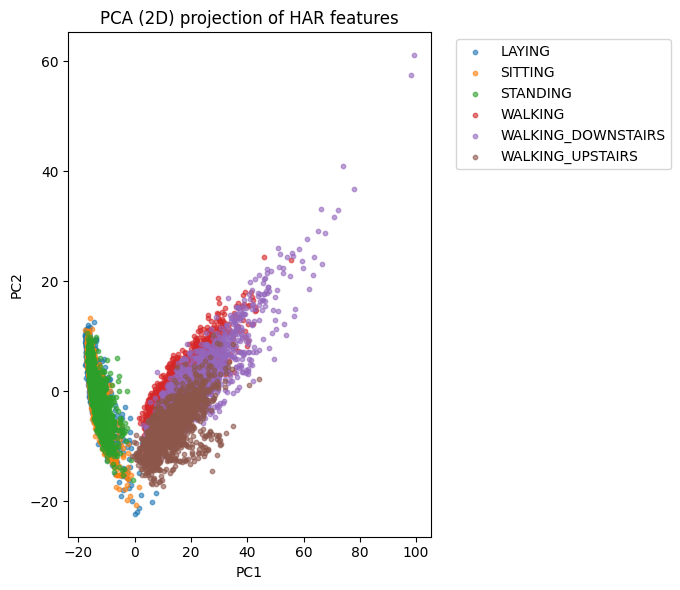

In [ ]:
# Optional: PCA 2D scatter of the whole dataset, coloured by activity
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(7, 6))
for activity in np.unique(y):
    idx = (y == activity)
    plt.scatter(X_pca_vis[idx, 0], X_pca_vis[idx, 1], s=10, alpha=0.6, label=activity)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D) projection of HAR features")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
